In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

## EDA

Reading the file train.csv into Python and print a few rows.

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Calculating the number of surviving/non-surviving passengers and displaying it as a bar plot.

In [3]:
survived = df.groupby('Survived')['Survived'].count()

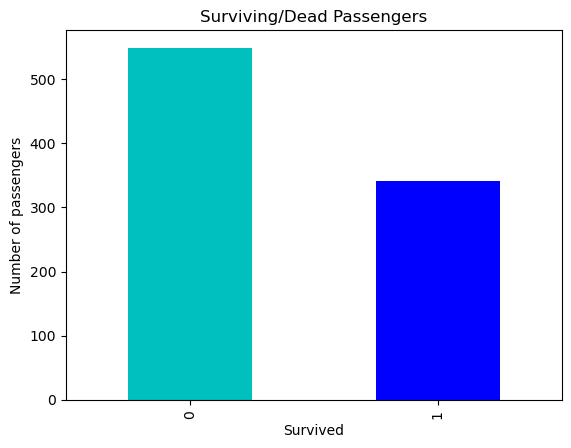

In [4]:
survived.plot.bar(color=['c','b'])
plt.ylabel('Number of passengers')
plt.xlabel("Survived")
plt.title("Surviving/Dead Passengers");

In [5]:
fcl=df.groupby(['Pclass', 'Survived']).agg(Count=('Survived','count'))
fcl.reset_index(inplace=True)

,Pclass,Survived,Count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


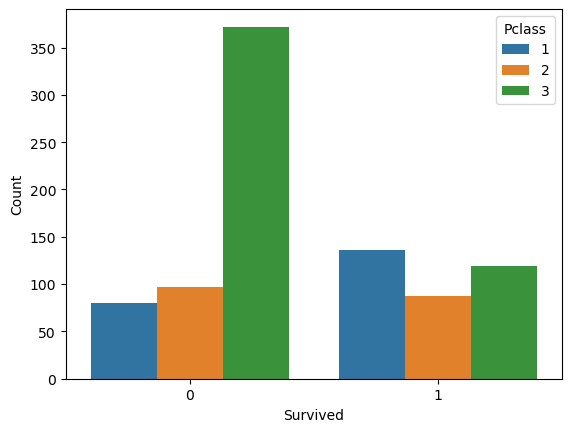

In [6]:
#fcl.plot.bar(color=['c', 'b'])
sns.barplot(data=fcl, x='Survived', y ='Count', hue = 'Pclass');

fcl

In [7]:
FCLSurvivorRatio= fcl.loc[1,'Count']/(fcl.loc[0,'Count']+fcl.loc[1,'Count'])
FCLSurvivorRatio

0.6296296296296297

63% of the passengers in the 'first class' survived the mishap 

In [8]:
sclass=df.groupby(['Sex', 'Pclass']).agg(Count=('Pclass', 'count'))

sclass.reset_index(inplace=True)
sclass.columns


Index(['Sex', 'Pclass', 'Count'], dtype='object')

Text(0.5, 1.0, 'Passenger based on class and sex')

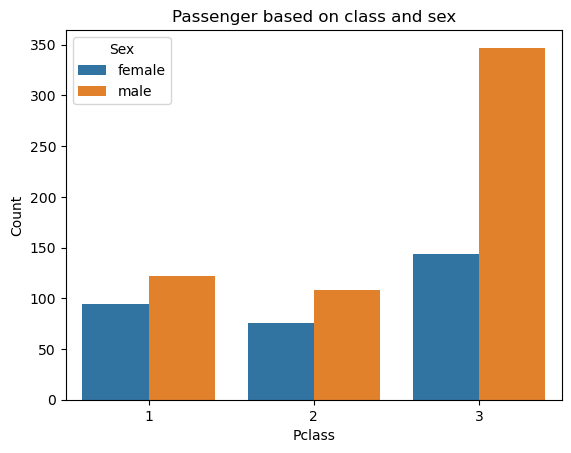

In [9]:
sns.barplot(x='Pclass', y='Count', hue='Sex', data= sclass);
#sclass.plot.bar()
plt.title('Passenger based on class and sex')

Age distribution of passengers. Compare surviving/non-surviving passengers.

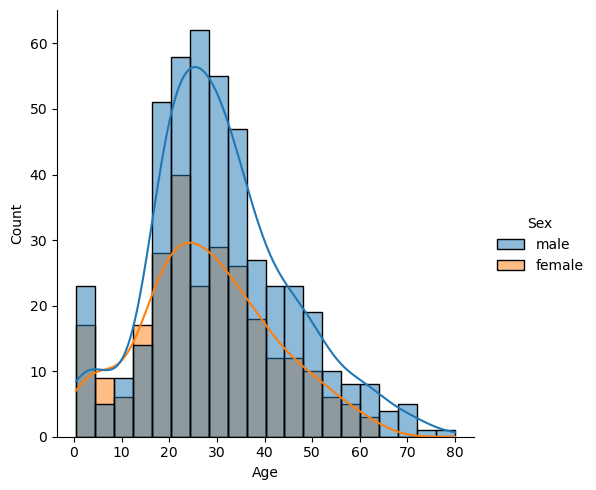

In [10]:
sns.displot(data= df, x='Age', kde=True, hue='Sex');

In [11]:
mAge= df.groupby('Survived').agg(Age=('Age','mean'))

Replacing missing Age values by the mean age.

In [12]:
df.loc[df['Age'].isna(), ['Age']].transpose()
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.groupby(['Pclass', 'Sex'])['Survived'].agg(['count'])

count
Pclass Sex          
1      female     94
       male      122
2      female     76
       male      108
3      female    144
       male      347

In [14]:
df.loc[df['Pclass']==3].groupby('Survived')['Survived'].count()

Survived
0    372
1    119
Name: Survived, dtype: int64

# Feature engineering with the Titanic data

#### Initial cleanup
 - removing unwanted features(columns) that are not going to have an effect in the learning
 - checking for inconsistent data types, missing values 
 - removing them if needed - else replacing with values
 - These are first level changes at the df level

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Removing unwanted columns that are believed to have no influence in the ML process

In [16]:
#df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.loc[df['Embarked'].isna()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked has two NaN's. These can be filled with most repeated value in the Embarked column

#### Spliting the data into training and validation sets 
- finding the dependent and independent features 
- y = mx+c y is dependent and x is independent value which has an impact in the outcome. 
- y is the outcome vector and x is the input vector
- NOTE: removing the dependent vector from the independent otherwise the answers will be rubbish

In [19]:
y=df['Survived']
X=df.drop(['Survived'], axis=1)

Cabin feature is missing a lot of values. Therefore it is better to leave it out

In [20]:
X.drop(columns=['Cabin'], inplace=True)

The following columns have no significance in the ML model. Therefore they are being dropped

In [21]:
X.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [22]:
X.head() # Data looks better now

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


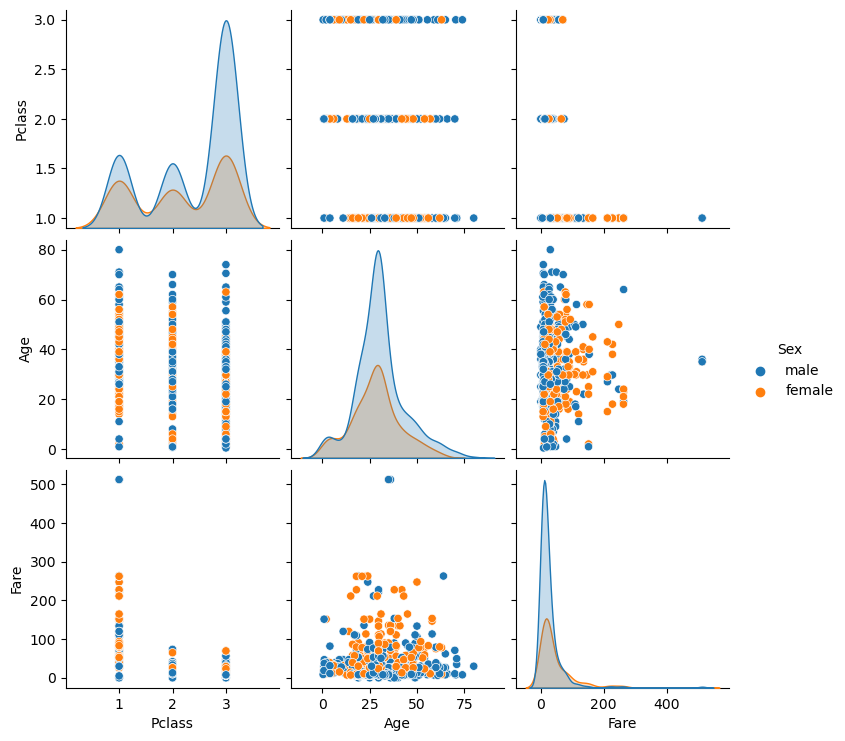

In [23]:
sns.pairplot(X[['Pclass', 'Sex', 'Age', 'Fare']], hue ='Sex');

Embarked feature has two missing values. They have to be imputed before going ahead with model fitting and transformation.    
Test data is split with a simple train_test_split model selection method

In [24]:
# import model selection function
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, auc



#### Imputing, Encoding, Fitting and Transforming happens after the data is split into training and test data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=14, stratify=y)

In [26]:
from sklearn.impute import SimpleImputer


Creating a pipeline to impute mean into missing values and discretize the feature into bins

In [27]:
impute_bin_pipeline = Pipeline([
    ('mean_imputer', SimpleImputer(strategy='mean')),
    ('bin_discretizer', KBinsDiscretizer())
])

Creating a pipeline to impute most frequest values in the feature and then do OHE to simplify the columns

In [28]:
impute_ohe_pipeline = Pipeline([
    ('freq_imputer', SimpleImputer(strategy='most_frequent')),
    ('freq_ohe', OneHotEncoder())
])

Connecting all the pipelines and the encoders using a column transformer

In [29]:
column_transformer = ColumnTransformer([
    ('pline', impute_ohe_pipeline, ['Embarked']),
    ('ohe_ct', OneHotEncoder(), ['Pclass', 'Sex']),
    ('impute_bin_ct', impute_bin_pipeline, ['Age', 'Fare']),
    #('impute_scaler', MinMaxScaler(), ['Fare']), # CHANGED HERE
    ('pass', 'passthrough', ['SibSp', 'Parch'])
], remainder = 'drop')
column_transformer

ColumnTransformer(transformers=[('pline',
                                 Pipeline(steps=[('freq_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('freq_ohe',
                                                  OneHotEncoder())]),
                                 ['Embarked']),
                                ('ohe_ct', OneHotEncoder(), ['Pclass', 'Sex']),
                                ('impute_bin_ct',
                                 Pipeline(steps=[('mean_imputer',
                                                  SimpleImputer()),
                                                 ('bin_discretizer',
                                                  KBinsDiscretizer())]),
                                 ['Age', 'Fare']),
                                ('pass', 'passthrough', ['SibSp', 'Parch'])])

### Using the Random forest classifier

In [30]:
general_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('model', RandomForestClassifier(max_depth=5))
])

In [31]:
general_pipeline.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pline',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('freq_ohe',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('ohe_ct', OneHotEncoder(),
                                                  ['Pclass', 'Sex']),
                                                 ('impute_bin_ct',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('bin_discretizer',
                                                                   KBinsDiscretizer())]),
                                                  ['Age', 'Fare']),
                                                 ('pass', 'passthrough',
                                                  ['SibSp', 'Parch'])])),
                ('model', RandomForestClassifier(max_depth=5))])

In [32]:
general_pipeline.score(X_test, y_test)

0.8071748878923767

In [33]:
general_pipeline.predict(X_test);

general_pipeline.predict_proba(X_test);

#### Calculating the accuracy of the model

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [35]:
ypred = general_pipeline.predict(X_train) #generating predictive results
accuracy_score(y_train, ypred) #compare predictive results to actual results

0.8383233532934131

In [36]:
general_pipeline.score(X_train, y_train)

0.8383233532934131

In [37]:
general_pipeline.score(X_test,y_test)

0.8071748878923767

In [38]:
print(f"""precision = {round(precision_score(y_train,ypred),2)} \n 
recall = {round(recall_score(y_train,ypred),2)}\n
f1 = {round(f1_score(y_train,ypred),2)}""")

precision = 0.87 
 
recall = 0.68

f1 = 0.76


#### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
conf = confusion_matrix(y_train, ypred)

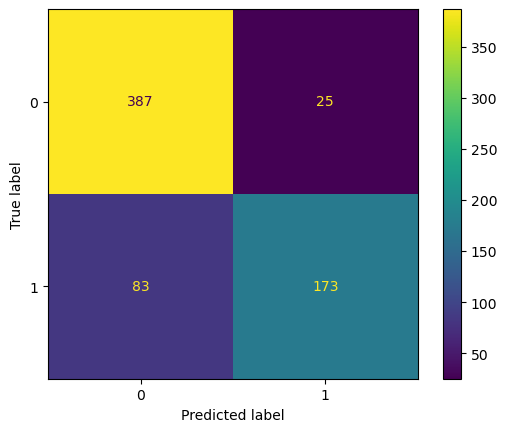

In [41]:
plotting = ConfusionMatrixDisplay(conf)
plotting.plot();

In [42]:
fpr, tpr, threshold = roc_curve(y_train, general_pipeline.predict_proba(X_train)[:,1]);
roc_auc=auc(fpr,tpr)

### Using the Logistic Regression classifier

In [43]:
general_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('model', LogisticRegression())
])

In [44]:
general_pipeline.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pline',
                                                  Pipeline(steps=[('freq_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('freq_ohe',
                                                                   OneHotEncoder())]),
                                                  ['Embarked']),
                                                 ('ohe_ct', OneHotEncoder(),
                                                  ['Pclass', 'Sex']),
                                                 ('impute_bin_ct',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('bin_discretizer',
                                                                   KBinsDiscretizer())]),
                                                  ['Age', 'Fare']),
                                                 ('pass', 'passthrough',
                                                  ['SibSp', 'Parch'])])),
                ('model', LogisticRegression())])

In [45]:
general_pipeline.score(X_test, y_test)

general_pipeline.predict(X_test);

general_pipeline.predict_proba(X_test);

#### Calculating the accuracy of the model

In [46]:
ypred = general_pipeline.predict(X_train) #generating predictive results
accuracy_score(y_train, ypred) #compare predictive results to actual results

0.7949101796407185

In [47]:
general_pipeline.score(X_train, y_train)

0.7949101796407185

In [48]:
general_pipeline['model'].coef_, general_pipeline['model'].intercept_

(array([[ 0.09419081,  0.14736624, -0.24171002,  0.69731581,  0.11984464,
         -0.81731342,  1.31313403, -1.313287  ,  0.90010096, -0.09338819,
         -0.20819539, -0.01942099, -0.57924936, -0.65670203, -0.25648742,
          0.21959244,  0.16906645,  0.5243776 , -0.44373085, -0.03494281]]),
 array([0.41721879]))

In [49]:
general_pipeline.score(X_test, y_test)

0.7668161434977578

The test/validation score is much lesser than the training data score. Therefore the threshold is not chosen optimally.

In [50]:
print(f"""precision = {round(precision_score(y_train,ypred),2)} \n 
recall = {round(recall_score(y_train,ypred),2)}\n
f1 = {round(f1_score(y_train,ypred),2)}""")

precision = 0.76 
 
recall = 0.68

f1 = 0.72


#### Confusion Matrix

In [51]:
conf = confusion_matrix(y_train, ypred)

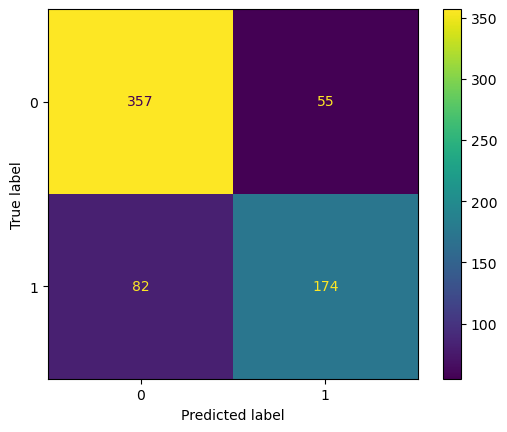

In [52]:
plotting = ConfusionMatrixDisplay(conf)
plotting.plot();

#### ROC

In [53]:
general_pipeline.predict(X_train);

In [54]:
general_pipeline.predict_proba(X_train);

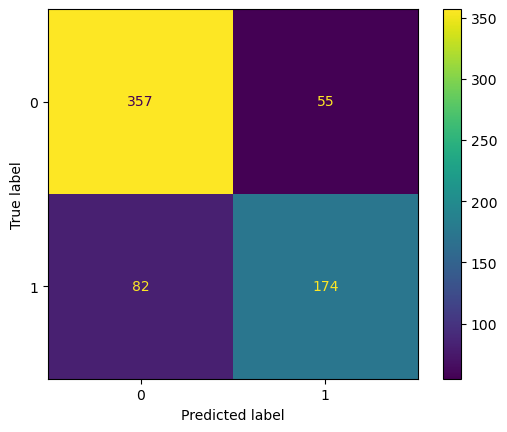

In [55]:
conf = confusion_matrix(y_train, general_pipeline.predict(X_train))
plotting = ConfusionMatrixDisplay(conf)
plotting.plot();

In [56]:
fpr1, tpr1, threshold1 = roc_curve(y_train, general_pipeline.predict_proba(X_train)[:,1]);
roc_auc1=auc(fpr1,tpr1)

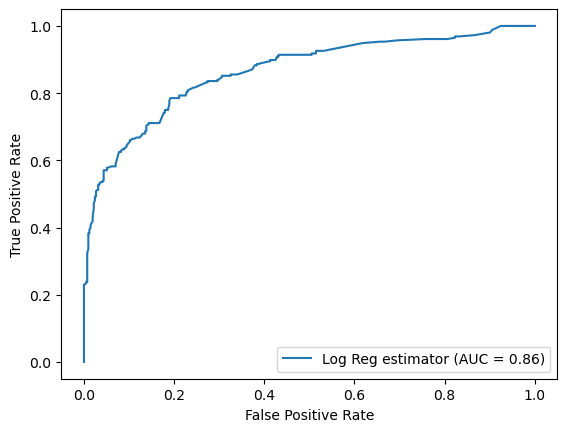

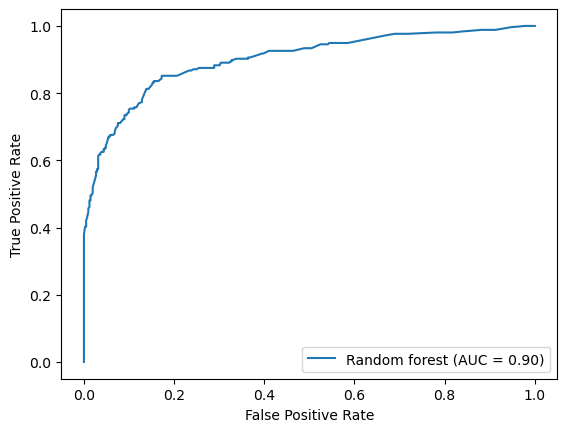

In [57]:
r1= RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Log Reg estimator').plot();
r= RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random forest').plot();

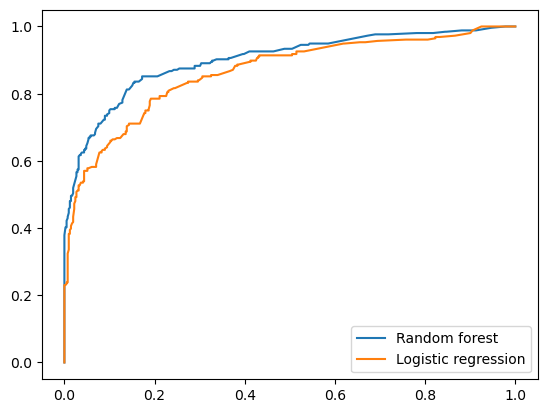

In [58]:
plt.plot(fpr,tpr);
plt.plot(fpr1,tpr1)
plt.legend(['Random forest', 'Logistic regression'])

In [59]:
print(f"""
      fpr={fpr} \n 
      
      tpr={tpr} \n 
      
      thresholds={np.round(threshold, 2)}""");


      fpr=[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00242718 0.00485437
 0.00485437 0.00485437 0.00485437 0.00728155 0.00728155 0.00970874
 0.00970874 0.00970874 0.01213592 0.01213592 0.01213592 0.01456311
 0.01456311 0.01456311 0.01699029 0.01941748 0.01941748 0.01941748
 0.02669903 0.02669903 0.02912621 0.02912621 0.0315534  0.0315534
 0.0315534  0.0315534  0.0315534  0.0315534  0.03398058 0.03640777
 0.03640777 0.03883495 0.04368932 0.04368932 0.0461165  0.0461165
 0.04854369 0.04854369 0.05097087 0.05339806 0.05339806 0.05582524
 0.05582524 0.05825243 0.05825243 0.06553398 0.06796117 0.06796117
 0.07038835 0.07524272 0.07524272 0.08009709 0.08737864 0.08980583
 0.08980583 0.09466019 0.0

In [60]:
max_value, max_index = np.max(tpr - fpr), np.argmax(tpr - fpr)

In [61]:
print(threshold[max_index],
      fpr[max_index],
      tpr[max_index])

0.364443490392172 0.1553398058252427 0.8359375
